In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Project Description

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.   
**Independent Variables:** 
1.Loan_ID - This refer to t he unique identifier of the applicant's affirmed purchases  
2.Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions  
3.Married - This refers to applicant being in a state of matrimony  
4.Dependents - This refres to persons who depends on the applicants for survival  
5.Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university  
6.Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer  
7.Applicant Income - This refers to disposable income available for the applicant's use under State law.  
8.CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.  
9.Loan_Amount - This refers to the amount of money an applicant owe at any given time.  
10.Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant  
11.Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.  
12.Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.  
13.Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.  
You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset.   
Dataset Link-  https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv  


# Importing Dataset

In [2]:
df=pd.read_csv(r'E:\fliprobo technologies\projects\Evaluation projects\Evaluation projects 2nd\loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Exploratory Data analysis (EDA)

In [3]:
df.shape

(614, 13)

the dataset contains 614 rows and 13 columns.Out of which 1 is target variable(label,Dependent variable) and remaining 12 are independent variables(features,input variables)

In [4]:
# checking the column of the dataset and we are storeing it in the list 
df.columns.tolist()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [5]:
# checking data types of the columns
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

We can see there are three format of data types:

object: Object format means variables are categorical. Categorical variables in our dataset are: Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status.

int64: It represents the integer variables. ApplicantIncome is of this format.

float64: It represents the variable which have some decimal values involved. They are also numerical variables. Numerical variables in our dataset are: CoapplicantIncome, LoanAmount, Loan_Amount_Term, and Credit_History.

# checking the null values

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

there are null values present in Gender,Married,Dependents,self_Employed,loanAmount,LoanAmountTerm,Credit_History

<AxesSubplot:>

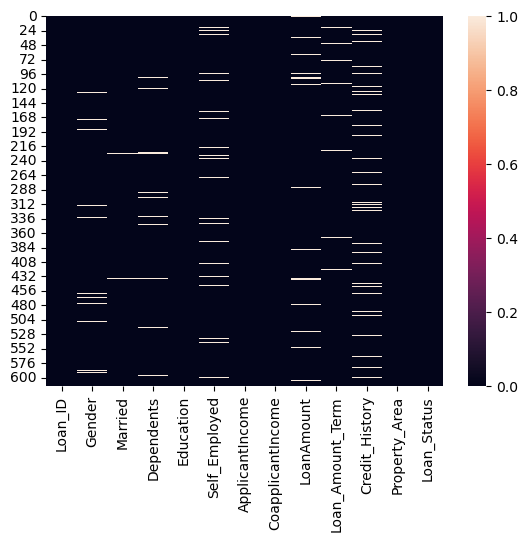

In [7]:
# lets visualize it using heatmap
sns.heatmap(df.isnull())

on visualizing we found null values are present

# Univariate Analysis

### Target Variable

In [8]:
df["Loan_Status"].count()

614

Size of our target variable is : 614

In [9]:
df["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

Among 614 Loan_Status : Accepted : 422 Rejected : 192

<AxesSubplot:title={'center':'Loan_Status'}>

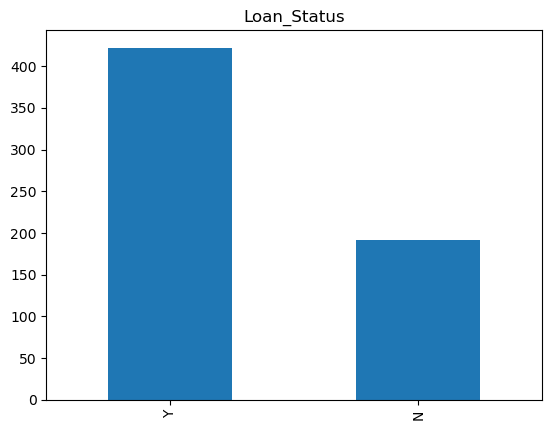

In [10]:
df["Loan_Status"].value_counts().plot.bar(title = 'Loan_Status')

The loan of 422(around 69%) people out of 614 was approved.

# Analysis on "Gender" column

In [11]:
df["Gender"].count()

601

Size of our "Gender" variable is : 614

In [12]:
df["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

Among 601 person: Male : 489 Female : 112

<AxesSubplot:title={'center':'Gender'}>

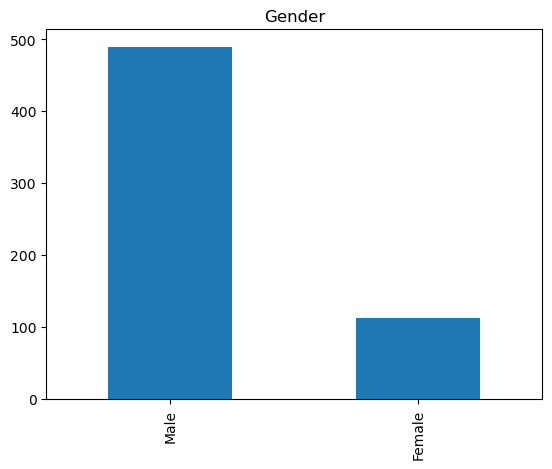

In [13]:
df['Gender'].value_counts().plot.bar(title= 'Gender')

# Analysis on "Married" variable :

In [14]:
df["Married"].count()

611

In [15]:
df["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

<AxesSubplot:title={'center':'Married'}>

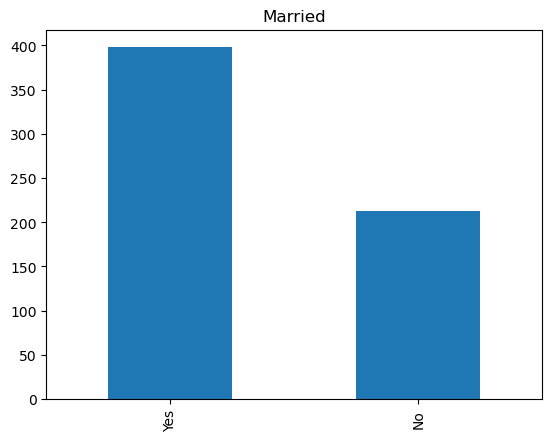

In [16]:
df['Married'].value_counts().plot.bar(title= 'Married')

From the Grapch we see that :

Number of married people : 65%

Number of unmarried people : 35%

# Analysis on "Self_Employed" variable :

In [17]:
df["Self_Employed"].count()

582

Size of our "Self_Employed" variable is : 582

In [18]:
df["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

Total number of people : 582

Self_Employed : 82

Not_Self_Employed : 500

<AxesSubplot:title={'center':'Self_Employed'}>

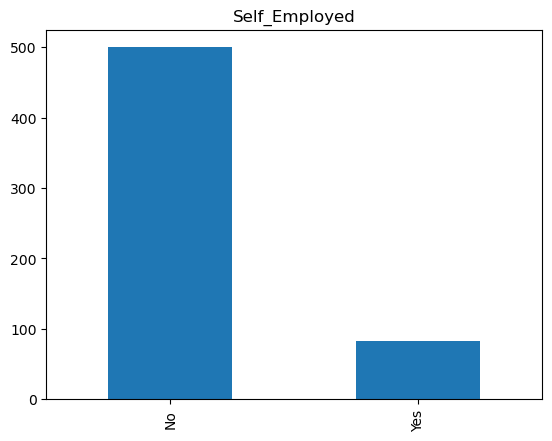

In [19]:
df['Self_Employed'].value_counts().plot.bar(title='Self_Employed')

Among 582 people only 14% are Self_Employed and rest of the 86% are Not_Self_Employed

# Analysis on "Credit_History" variable :

In [20]:
df["Credit_History"].count()

564

Size of our "Credit_History" variable is : 564

In [21]:
df["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

Total number of debts : 564

Repaid Debts : 475

Not Repaid Debts : 89

<AxesSubplot:title={'center':'Credit_History'}>

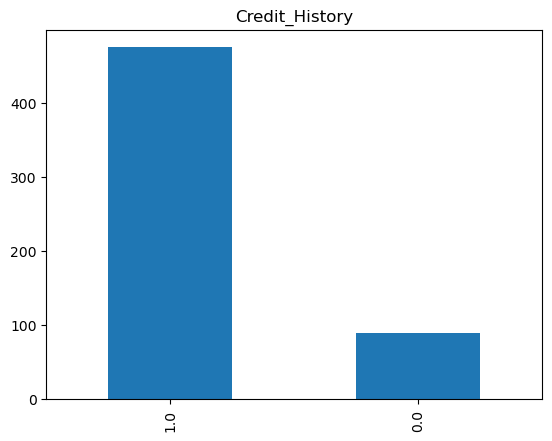

In [22]:
df['Credit_History'].value_counts().plot.bar(title='Credit_History')

Around 84% applicants have repaid their debts.

# Analysis on "Dependents" variable :

In [23]:
df['Dependents'].count()

599

Size of our "Dependents" variable is : 599

In [24]:
df["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Number of 0 Dependent : 345

Number of 1 Dependent : 102

Number of 2 Dependesnt : 101

Number of 3+ Dependent : 51

<AxesSubplot:title={'center':'Dependents'}>

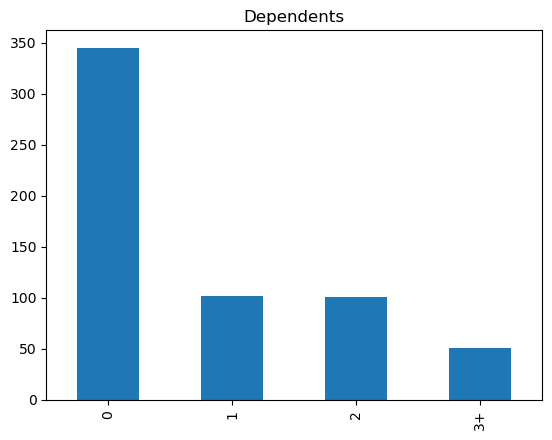

In [25]:
df['Dependents'].value_counts().plot.bar(title="Dependents")

58% people have 0 dependent

17% people have 1 dependent

17% people have 2 dependent

8% people have 3+ dependent

# Analysis on "Education" variable :

In [26]:
df["Education"].count()

614

Size of Education variable : 614

In [27]:
df["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

People who are Graduated : 480

People who are not Graduated : 134

<AxesSubplot:title={'center':'Education'}>

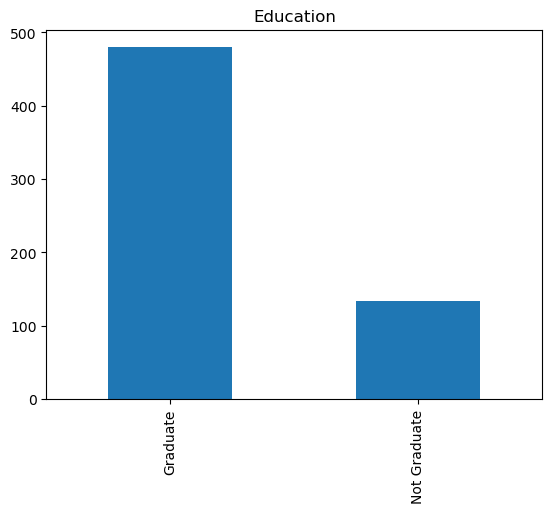

In [28]:
df["Education"].value_counts().plot.bar(title = "Education")

Total number of People : 614

78% are Graduated and 22% are not Graduated

# Analysis on "Property_Area" variable :

In [29]:
df["Property_Area"].count()

614

Size of "Property_Area" variable : 614

In [30]:
df["Property_Area"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Total number of People : 614

People from Semiurban area : 233

People from Urban area : 202

People from Rural area : 179

<AxesSubplot:title={'center':'Property_Area'}>

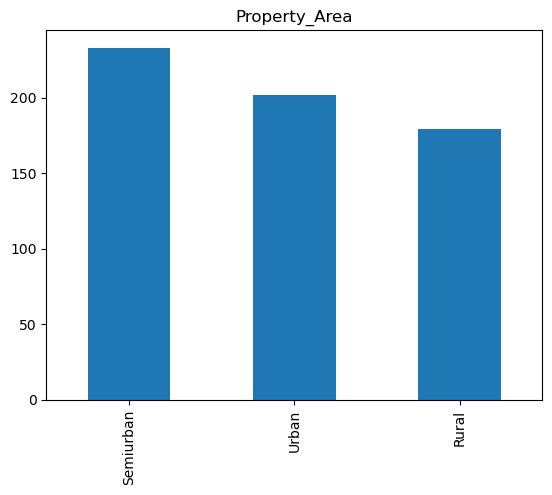

In [31]:
df["Property_Area"].value_counts().plot.bar(title="Property_Area")

38% people from Semiurban area

33% people from Urban area

29% people from Rural area

# "ApplicantIncome" distribution 

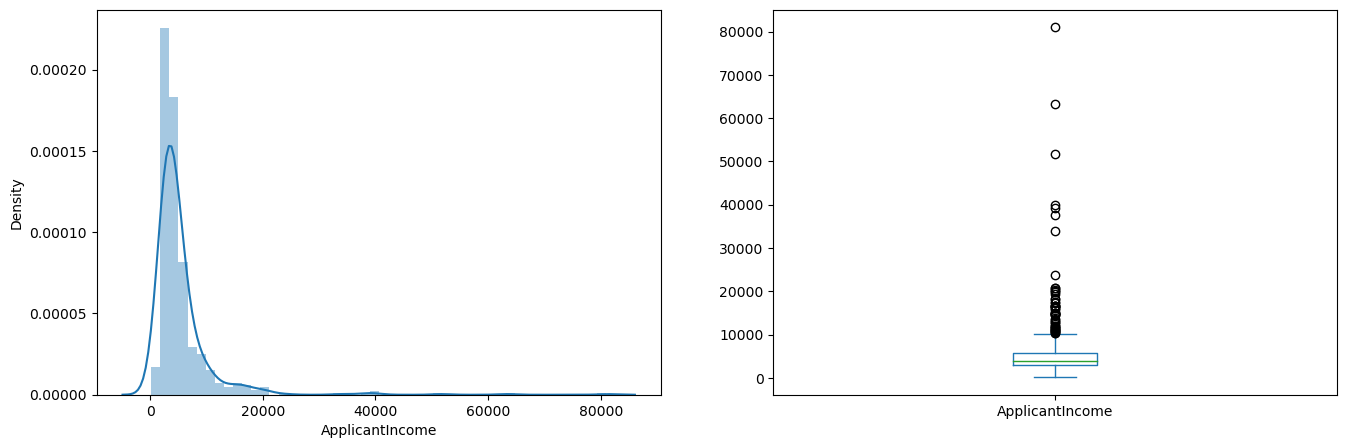

In [32]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df["ApplicantIncome"]);

plt.subplot(122)
df["ApplicantIncome"].plot.box(figsize=(16,5))
plt.show()

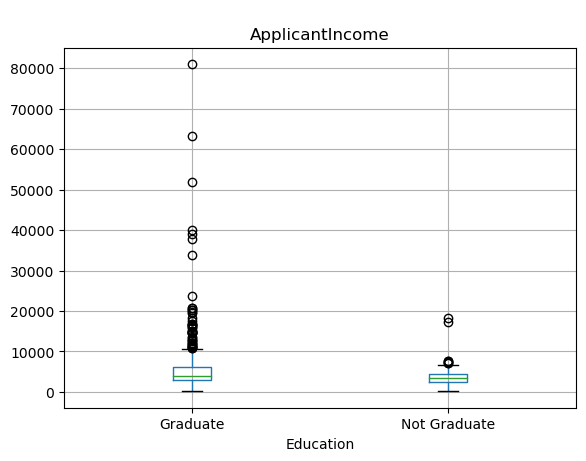

In [33]:
df.boxplot(column='ApplicantIncome',by="Education" )
plt.suptitle(" ")
plt.show()

We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

# "CoapplicantIncome" distribution:

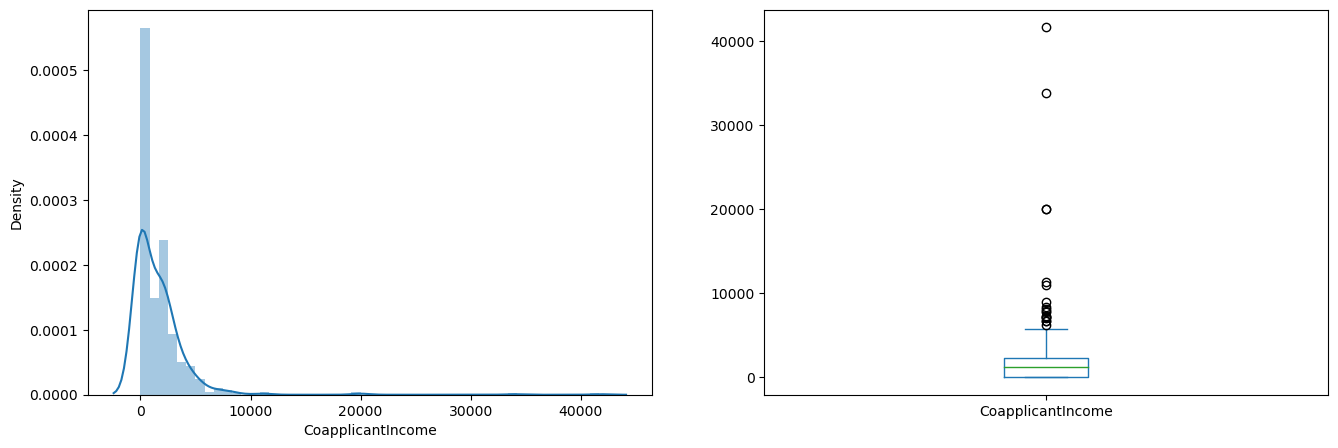

In [34]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df["CoapplicantIncome"]);

plt.subplot(122)
df["CoapplicantIncome"].plot.box(figsize=(16,5))
plt.show()

We see a similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

# "LoanAmount" variable distribution:

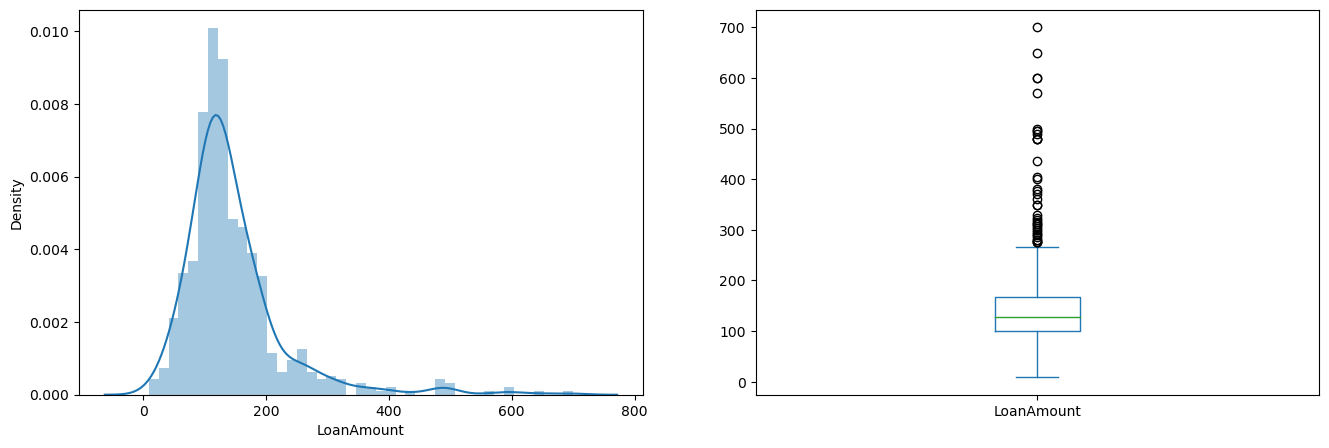

In [35]:
plt.figure(1)
plt.subplot(121)

sns.distplot(df['LoanAmount']);

plt.subplot(122)
df['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers in later sections.

# distribution of "LoanAmountTerm" variable :

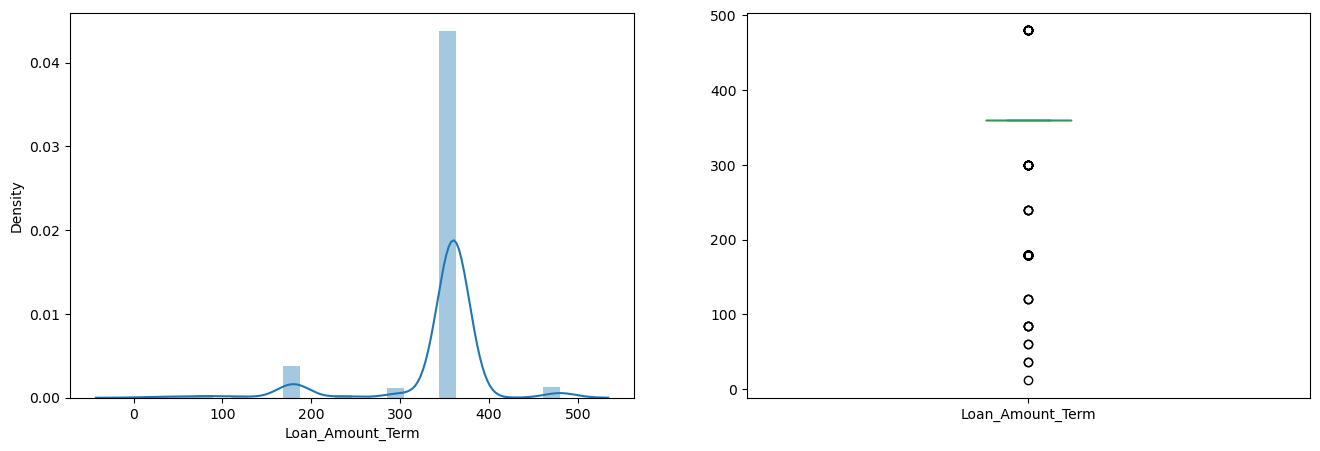

In [36]:
plt.figure(1)
plt.subplot(121)

sns.distplot(df["Loan_Amount_Term"]);

plt.subplot(122)
df["Loan_Amount_Term"].plot.box(figsize=(16,5))
plt.show()

We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers in later sections.

# Relation between "Loan_Status" and "Gender"

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


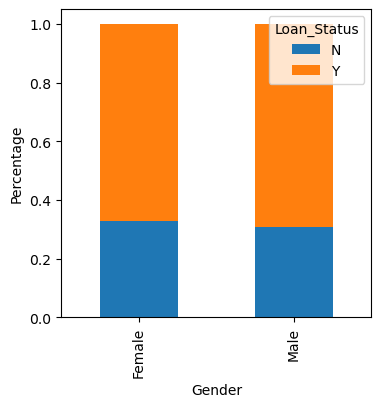

In [37]:
print(pd.crosstab(df["Gender"],df["Loan_Status"]))
Gender = pd.crosstab(df["Gender"],df["Loan_Status"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.show()

Number of Female whose Loan was approved : 75

Number of Male whose Loan was approved : 339

Number of Female whose Loan was not approved : 37

Number of Male whose Loan was not approved : 150

Proportion of Male applicants is higher for the approved loans.

# Relation between "Loan_Status" and "Married"

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


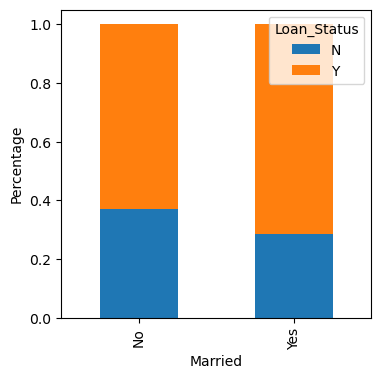

In [38]:
print(pd.crosstab(df["Married"],df["Loan_Status"]))
Married=pd.crosstab(df["Married"],df["Loan_Status"])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Married")
plt.ylabel("Percentage")
plt.show()

Number of married people whose Loan was approved : 258

Number of married people whose Loan was not approved : 113

Number of unmarried people whose Loan was approved : 134

Number of unmarried people whose Loan was not approved : 79

Proportion of Married applicants is higher for the approved loans.

# Relation between "Loan_Status" and "Dependents"

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


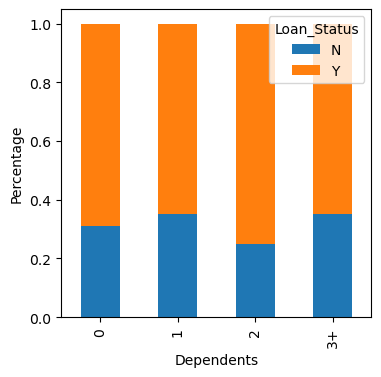

In [39]:
print(pd.crosstab(df['Dependents'],df["Loan_Status"]))
Dependents = pd.crosstab(df['Dependents'],df["Loan_Status"])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Dependents")
plt.ylabel("Percentage")
plt.show()

Number of dependents on the loan applicant : 0 and Loan was approved : 238

Number of dependents on the loan applicant : 0 and Loan was not approved : 107

Number of dependents on the loan applicant : 1 and Loan was approved : 66

Number of dependents on the loan applicant : 1 and Loan was not approved : 36

Number of dependents on the loan applicant : 2 and Loan was approved : 76

Number of dependents on the loan applicant : 2 and Loan was not approved : 25

Number of dependents on the loan applicant : 3+ and Loan was approved : 33

Number of dependents on the loan applicant : 3+ and Loan was not approved : 18

Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.

# Relation between "Loan_Status" and "Self_Employed"

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


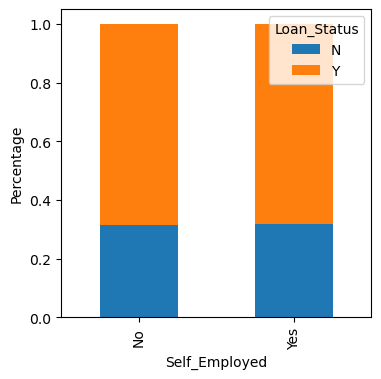

In [40]:
print(pd.crosstab(df["Self_Employed"],df["Loan_Status"]))
SelfEmployed = pd.crosstab(df["Self_Employed"],df["Loan_Status"])
SelfEmployed.div(SelfEmployed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Self_Employed")
plt.ylabel("Percentage")
plt.show()

People who are Self_Employed and Loan was approved : 56

People who are Self_Employed and Loan was not approved : 26

People who are not Self_Employed and Loan was approved : 343

People who are not Self_Employed and Loan was not approved : 157

There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

# Relation between "Loan_Status" and "Credit_History"

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


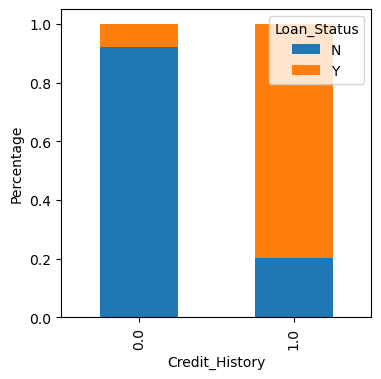

In [41]:
print(pd.crosstab(df["Credit_History"],df["Loan_Status"]))
CreditHistory = pd.crosstab(df["Credit_History"],df["Loan_Status"])
CreditHistory.div(CreditHistory.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Credit_History")
plt.ylabel("Percentage")
plt.show()

People with credit history as 1 and loan was approved : 378

People with credit history as 1 and loan was not approved : 97

People with credit history as 0 and loan was approved : 7

People with credit history as 0 and loan was not approved : 82

It seems people with credit history as 1 are more likely to get their loans approved.

# Dropping unwanted columns

In [42]:
df.drop(['Loan_ID'],axis=1,inplace=True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Missing value imputation

In [43]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [45]:
# take the mean to replace nan in continous data
LoanAmount_mean = df['LoanAmount'].mean()
Loan_Amount_Term_mean= df['Loan_Amount_Term'].mean()
Credit_History_mean=df['Credit_History'].mean()

In [46]:
# Replace NaN values with the mean
df['LoanAmount'].fillna(LoanAmount_mean, inplace=True)
df['Loan_Amount_Term'].fillna(Loan_Amount_Term_mean, inplace=True)
df['Credit_History'].fillna(Credit_History_mean, inplace=True)

In [47]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [48]:
# take the mode to replace nan in categorical data
Gender_mode = df['Gender'].mode()[0]
Married_mode= df['Married'].mode()[0]
Dependents_mode=df['Dependents'].mode()[0]
Self_Employed_mode=df['Self_Employed'].mode()[0]

In [49]:
# Replace NaN values with the mode
df['Gender'].fillna(Gender_mode, inplace=True)
df['Married'].fillna(Married_mode, inplace=True)
df['Dependents'].fillna(Dependents_mode, inplace=True)
df['Self_Employed'].fillna(Self_Employed_mode, inplace=True)

In [50]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Description of Dataset

In [51]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


The counts of all the columns are same which means there are no missing values left in the dataset.

# Checking for Outliers

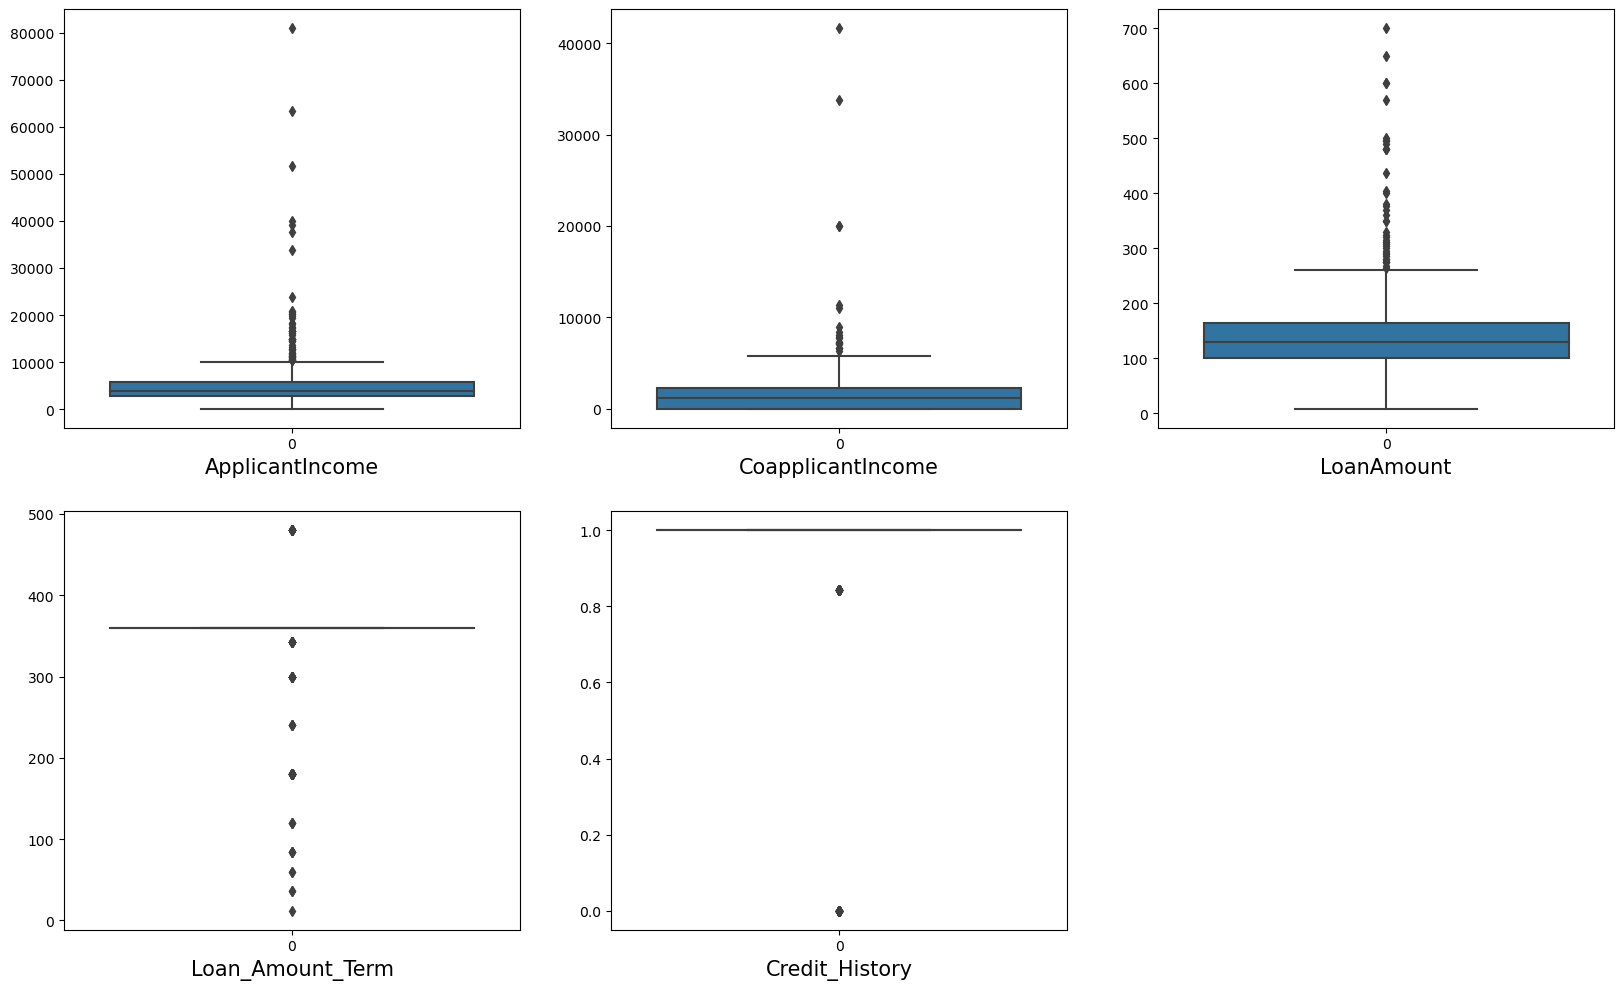

In [52]:
plt.figure(figsize=(20,25))
plot=1
for i in df:
    if df.dtypes[i] !='object':
        if plot<=20:
            plt.subplot(4,3,plot)
            sns.boxplot(data=df[i])
            plt.xlabel(i,fontsize=15)
        plot+=1
plt.show()

outliers present

# Encoding categorical columns

In [53]:
# here i am using Ordinal Encoder for encoding categorical column
from sklearn.preprocessing import OrdinalEncoder
OE= OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0,1.0
612,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0,1.0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    float64
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    float64
 11  Loan_Status        614 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 57.7 KB


we have converted, the categorical columns using OrdinalEncoding method

# removing outliers

In [55]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(614, 12)

In [56]:
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int64))


In [57]:
df1=df[(z<3).all(axis=1)]
print(df.shape)
print(df1.shape)

(614, 12)
(577, 12)


In [58]:
loss=(df.shape[0]-df1.shape[0])/df.shape[0]*100
print(loss)

6.026058631921824


6.02% dass loss

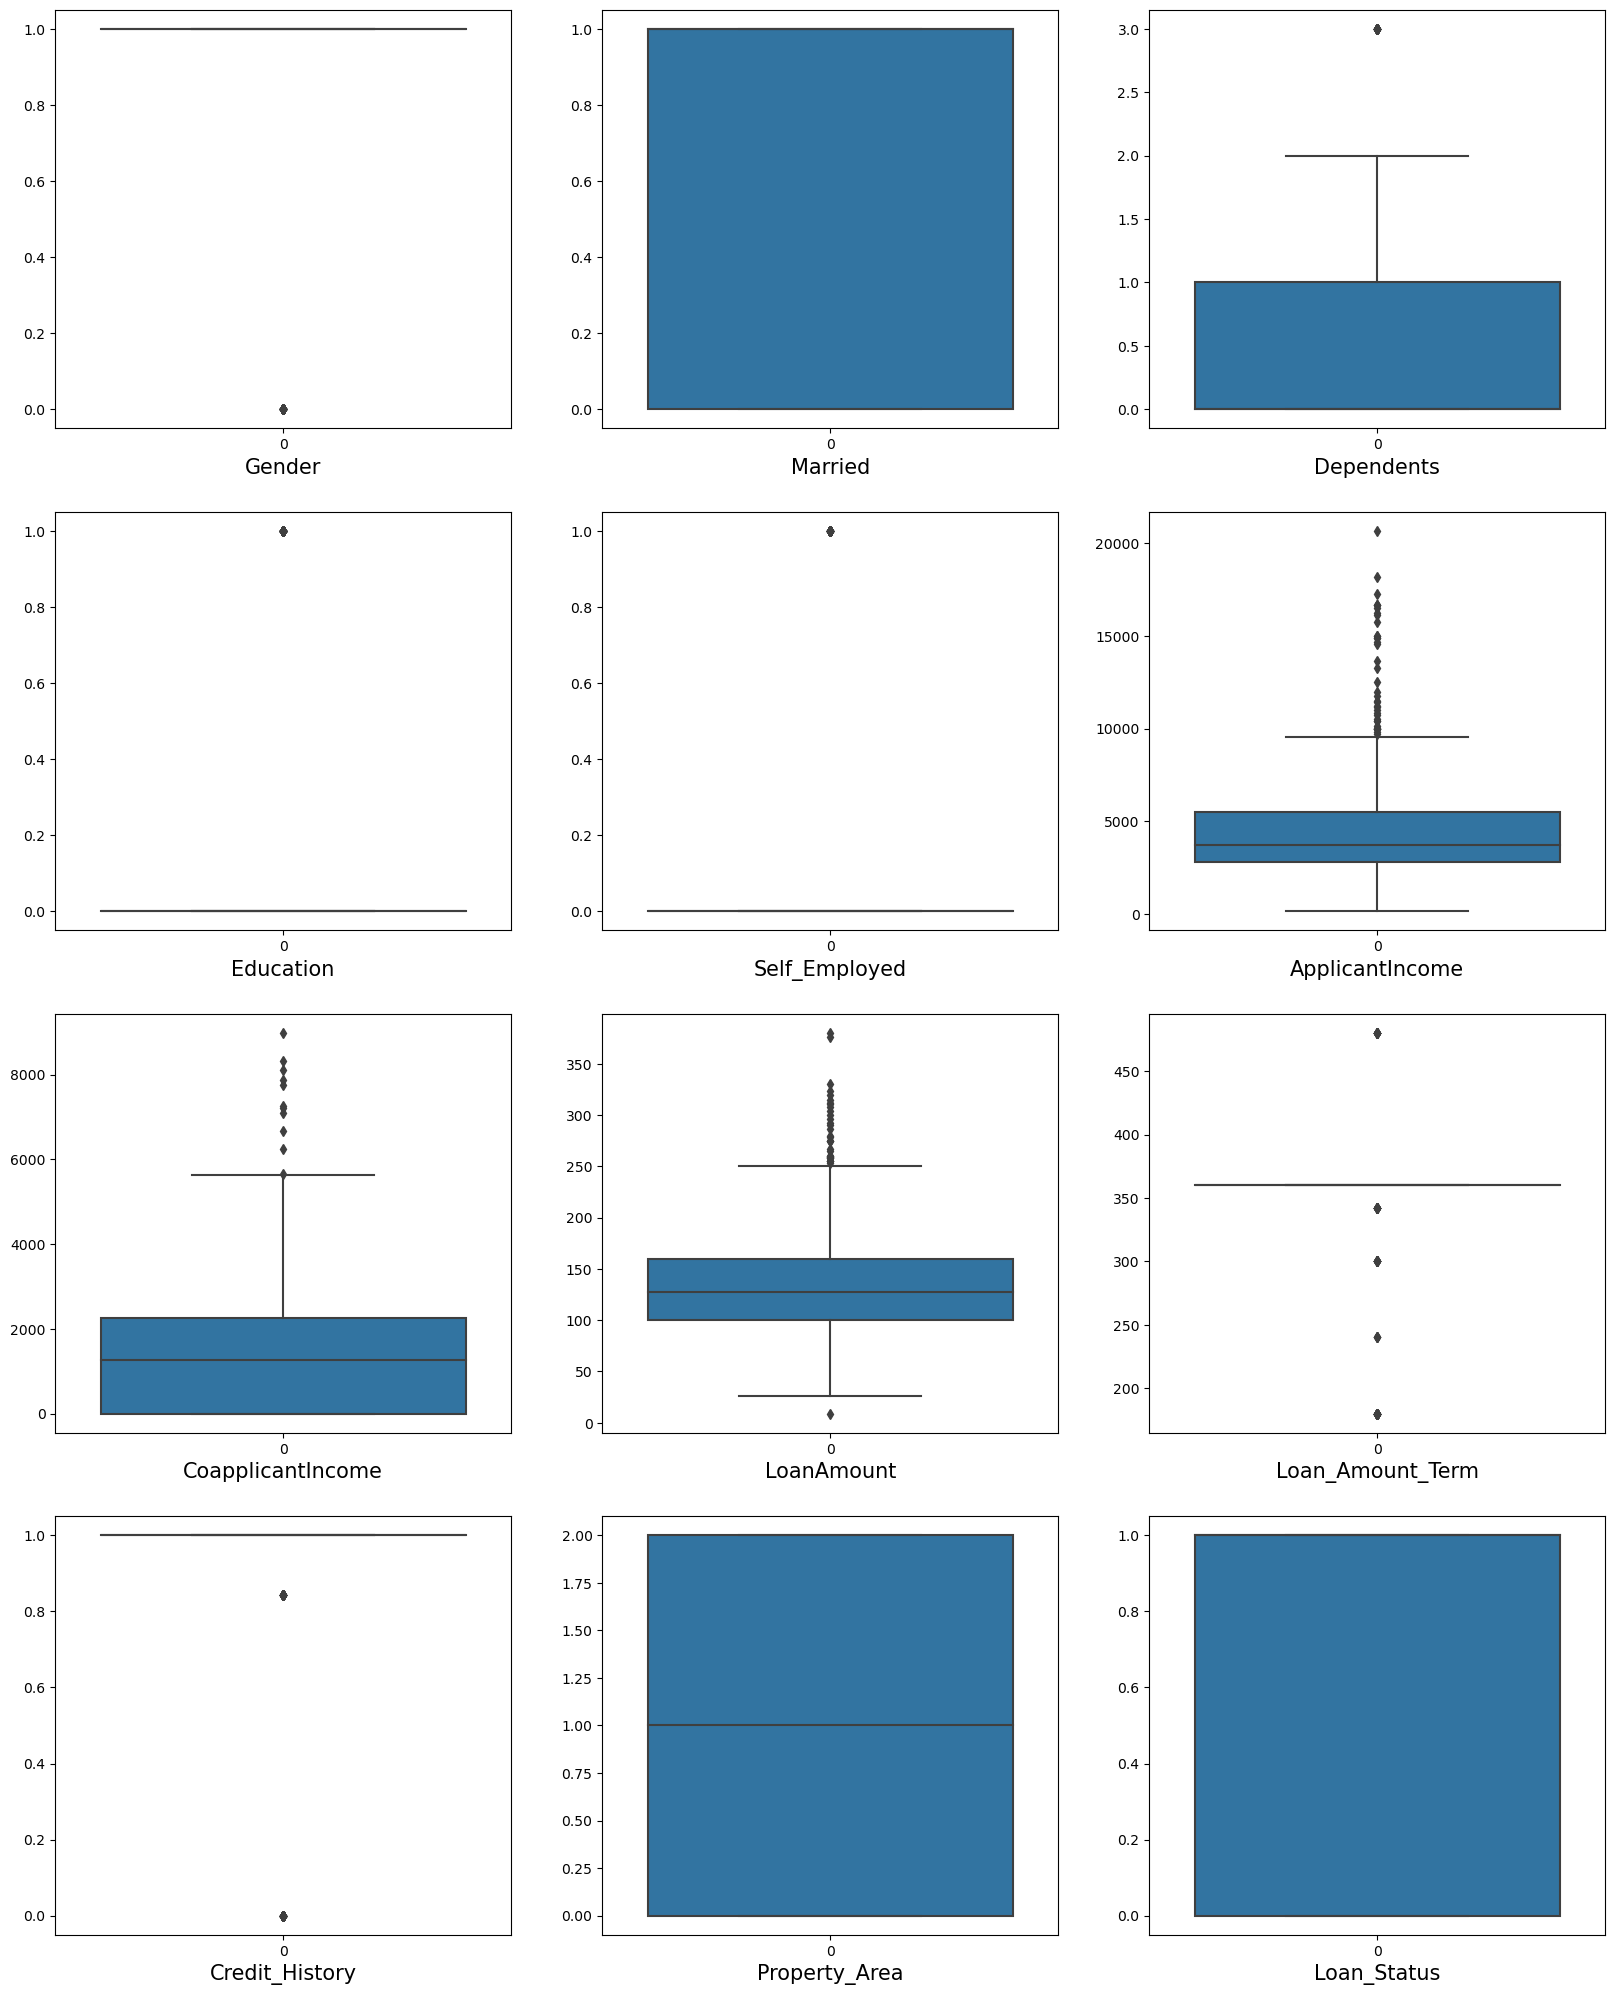

In [59]:
# checking outliers again
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for col in df1:
    if plotnumber<=14:
        ac=plt.subplot(4,3,plotnumber)
        sns.boxplot(data=df1[col])
        plt.xlabel(col,fontsize=15)
    plotnumber+=1
plt.show() 

In [60]:
print(np.where(z<-3))

(array([], dtype=int64), array([], dtype=int64))


no outliers left

# checking distribution

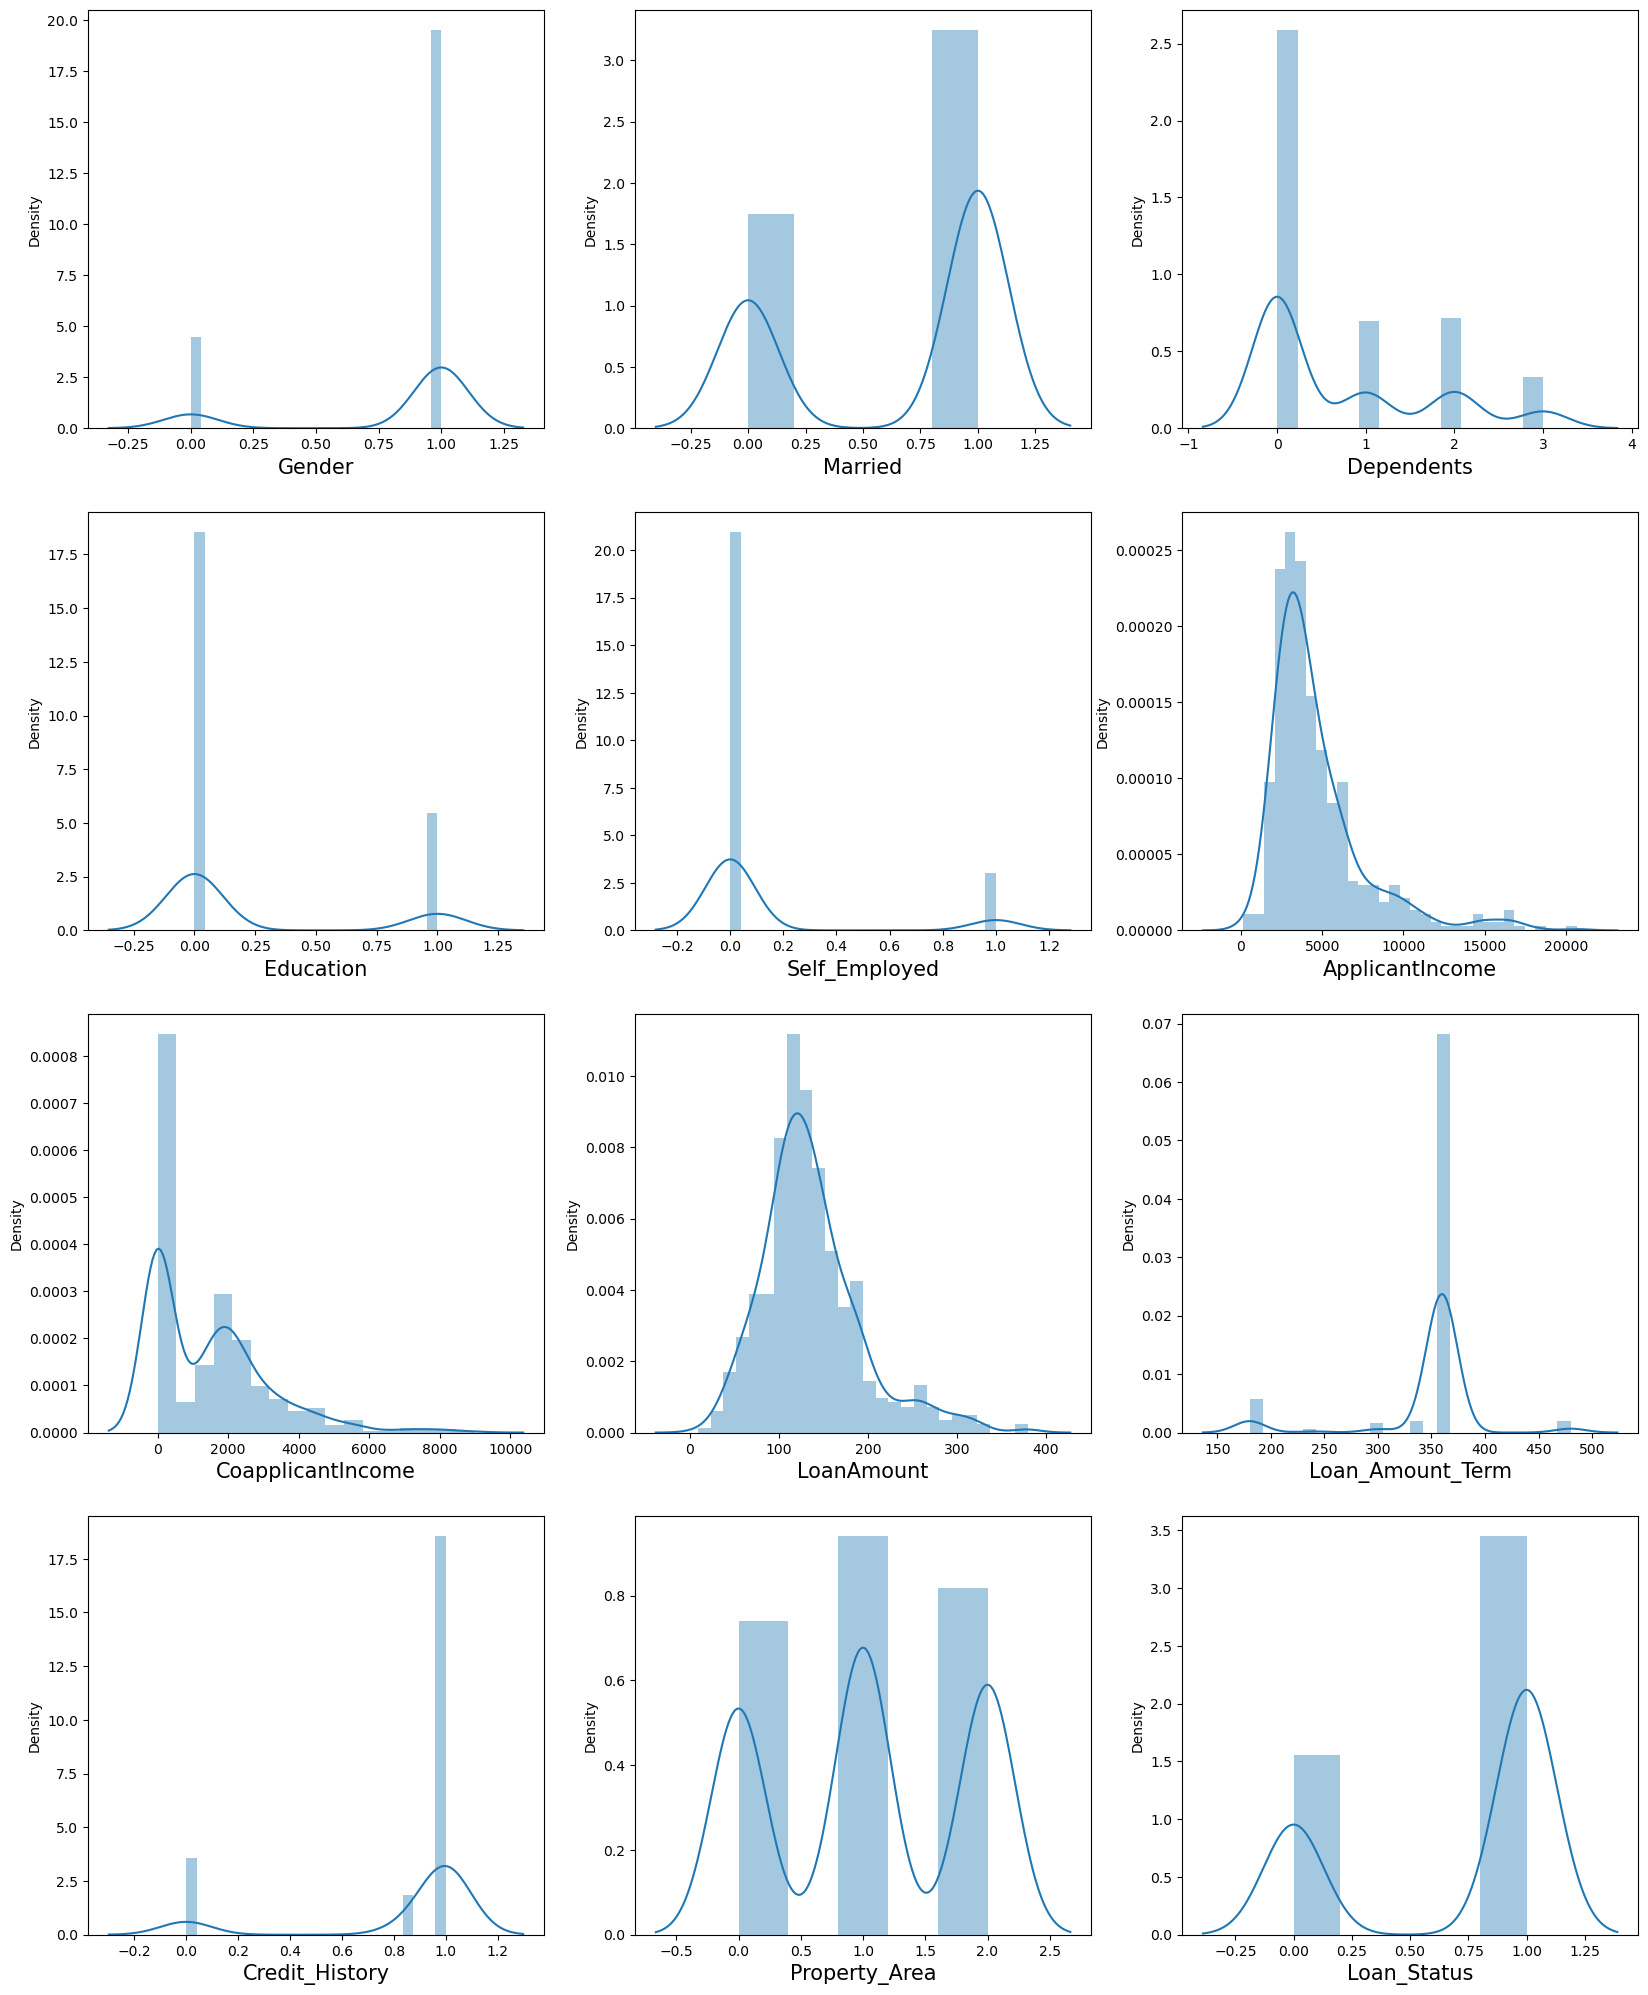

In [61]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for col in df1:
    if plotnumber<=14:
        ac=plt.subplot(4,3,plotnumber)
        sns.distplot(df1[col])
        plt.xlabel(col,fontsize=15)
    plotnumber+=1
plt.show() 

# checking skewness

In [62]:
df1.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [63]:
# removing skewness again
for i in df1:
    if df1[i].skew()>0.5:
        df1[i]=np.cbrt(df1[i])

In [64]:
df1.skew()

Gender              -1.622920
Married             -0.630211
Dependents           0.499408
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.845845
CoapplicantIncome   -0.038951
LoanAmount           0.017152
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

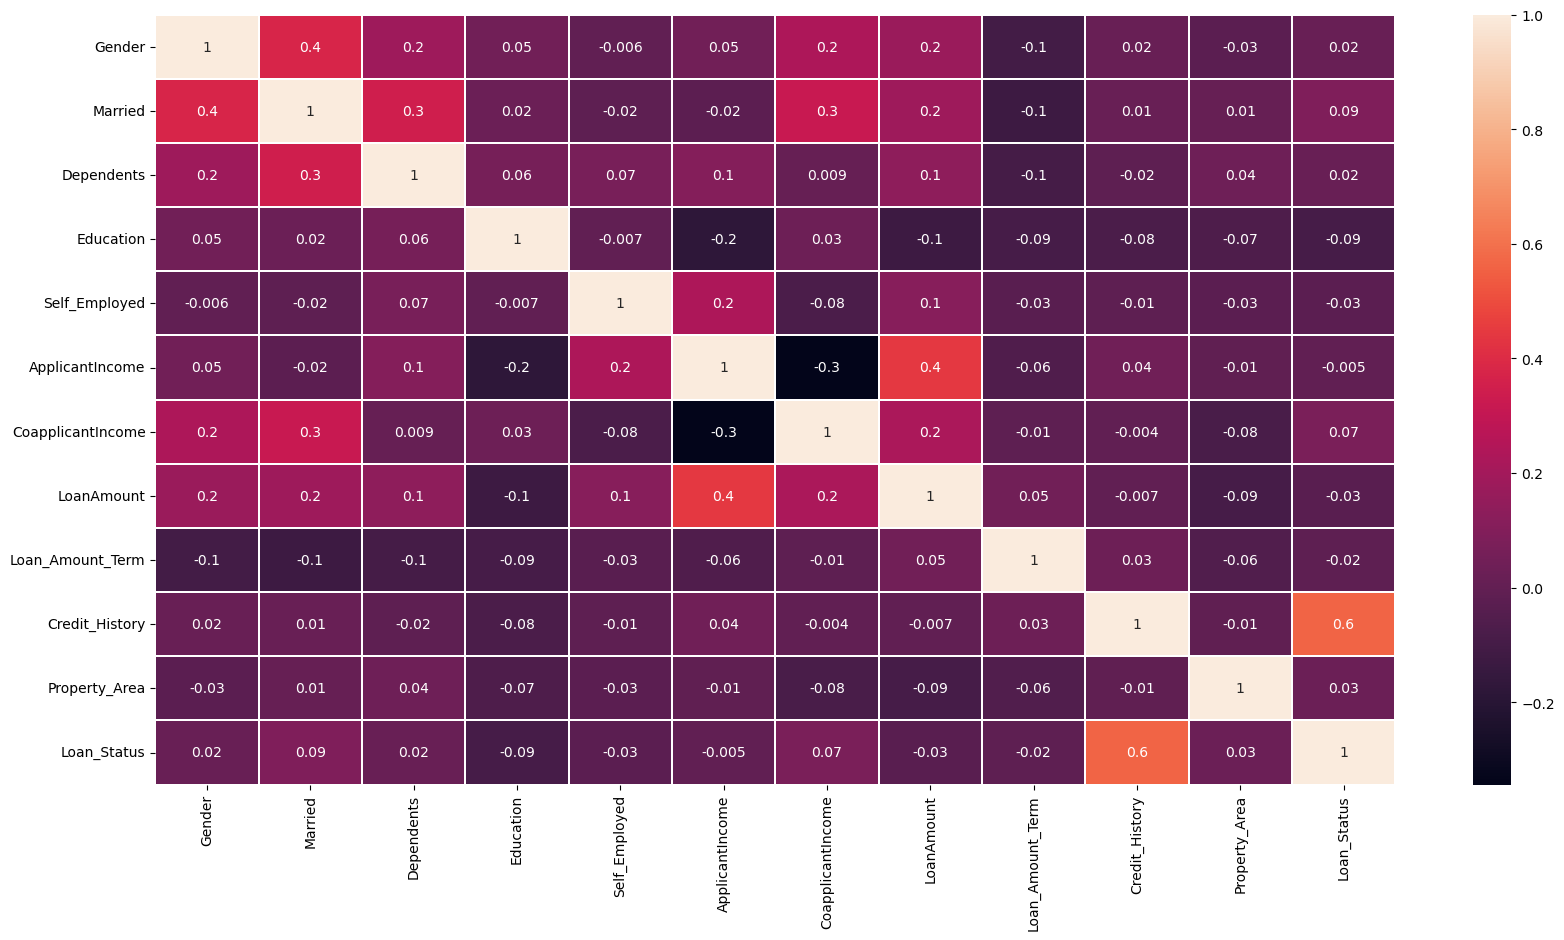

In [65]:
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(),annot=True,linewidths=0.1,fmt=".1g")
plt.show()

there is no high correlation between any features

# correlation with the target variable

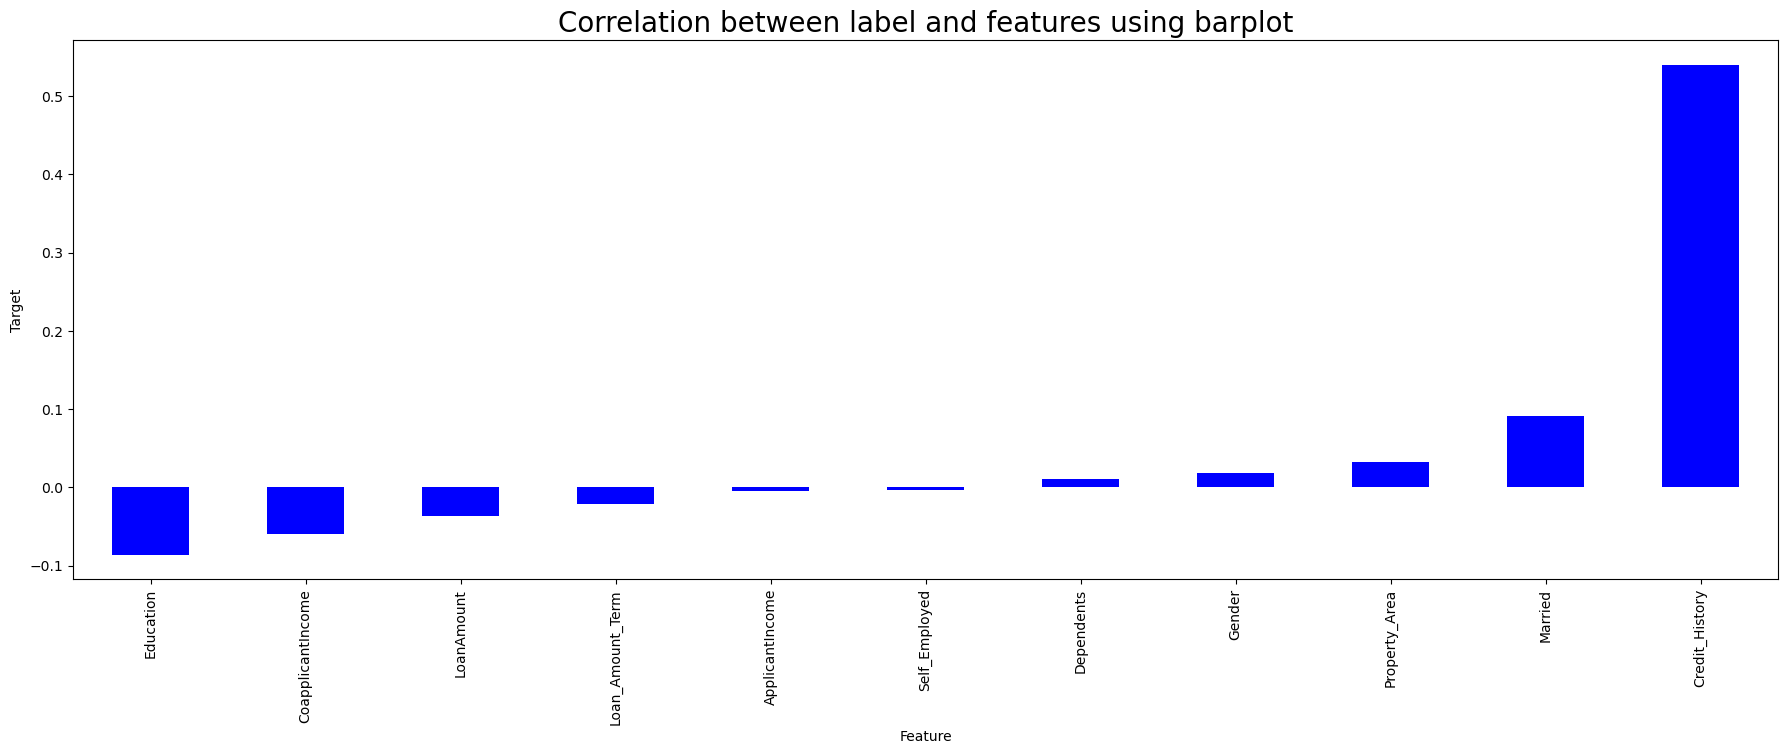

In [66]:
plt.figure(figsize=(22,7))
df.corr()['Loan_Status'].sort_values(ascending=True).drop(['Loan_Status']).plot(kind='bar',color='blue')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('Target',fontsize=10)
plt.title("Correlation between label and features using barplot",fontsize=20)
plt.show()

only credit history have high correlation with target

# seperating features and label

In [67]:
x=df1.drop("Loan_Status",axis=1)
y=df1["Loan_Status"]

# using Standard Scalarization

In [68]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x_scaled

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.806565,-0.541961,-0.380580,0.622825,-1.093504,0.318405,0.239408,0.456461,1.227472
1,0.477137,0.733939,0.878698,-0.541961,-0.380580,0.157351,0.596681,-0.012836,0.239408,0.456461,-1.306522
2,0.477137,0.733939,-0.806565,-0.541961,2.627567,-0.566533,-1.093504,-1.445145,0.239408,0.456461,1.227472
3,0.477137,0.733939,-0.806565,1.845150,-0.380580,-0.798730,0.868268,-0.166705,0.239408,0.456461,1.227472
4,0.477137,-1.362511,-0.806565,-0.541961,-0.380580,0.673686,-1.093504,0.224069,0.239408,0.456461,1.227472
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.806565,-0.541961,-0.380580,-0.620151,-1.093504,-1.302297,0.239408,0.456461,-1.306522
573,0.477137,0.733939,1.624005,-0.541961,-0.380580,-0.040329,-1.093504,-2.336409,-3.237229,0.456461,-1.306522
574,0.477137,0.733939,0.878698,-0.541961,-0.380580,1.298514,-0.177556,1.830577,0.239408,0.456461,1.227472
575,0.477137,0.733939,1.316734,-0.541961,-0.380580,1.161699,-1.093504,0.960923,0.239408,0.456461,1.227472


 We have Scaled the data using standard Scalarization method to overcome the issue of biasness

# Checking variance inflation factor

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.217137,Gender
1,1.417649,Married
2,1.186807,Dependents
3,1.071556,Education
4,1.063025,Self_Employed
5,1.804162,ApplicantIncome
6,1.593787,CoapplicantIncome
7,1.617523,LoanAmount
8,1.059455,Loan_Amount_Term
9,1.011555,Credit_History


there is no multicollinearity found

# Oversampling

In [70]:
y.value_counts()

1.0    398
0.0    179
Name: Loan_Status, dtype: int64

In [71]:
# oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y =SM.fit_resample(x_scaled,y)

In [72]:
# Checking value count of target column
y.value_counts()

1.0    398
0.0    398
Name: Loan_Status, dtype: int64

# finding the best Random state

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu=0         
maxRS=0           
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)  
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print(" Best accuracy is",maxAccu,"at random_state",maxRS)

 Best accuracy is 0.891213389121339 at random_state 13


# creating train test split

In [74]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.30,random_state=maxRS)

# model

In [75]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [76]:
# checking accuracy for LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.7447698744769874
[[ 66  51]
 [ 10 112]]
              precision    recall  f1-score   support

         0.0       0.87      0.56      0.68       117
         1.0       0.69      0.92      0.79       122

    accuracy                           0.74       239
   macro avg       0.78      0.74      0.73       239
weighted avg       0.78      0.74      0.74       239



In [77]:
# checking accuracy for RandomForestclassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.899581589958159
[[104  13]
 [ 11 111]]
              precision    recall  f1-score   support

         0.0       0.90      0.89      0.90       117
         1.0       0.90      0.91      0.90       122

    accuracy                           0.90       239
   macro avg       0.90      0.90      0.90       239
weighted avg       0.90      0.90      0.90       239



In [78]:
# checking accuracy for Support Vector Machine Classifier
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7698744769874477
[[ 83  34]
 [ 21 101]]
              precision    recall  f1-score   support

         0.0       0.80      0.71      0.75       117
         1.0       0.75      0.83      0.79       122

    accuracy                           0.77       239
   macro avg       0.77      0.77      0.77       239
weighted avg       0.77      0.77      0.77       239



In [79]:
# checking accuracy for GradientBoostingClassifier
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.8410041841004184
[[ 90  27]
 [ 11 111]]
              precision    recall  f1-score   support

         0.0       0.89      0.77      0.83       117
         1.0       0.80      0.91      0.85       122

    accuracy                           0.84       239
   macro avg       0.85      0.84      0.84       239
weighted avg       0.85      0.84      0.84       239



In [80]:
# checking accuracy for AdaBoost Classifier
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.7573221757322176
[[82 35]
 [23 99]]
              precision    recall  f1-score   support

         0.0       0.78      0.70      0.74       117
         1.0       0.74      0.81      0.77       122

    accuracy                           0.76       239
   macro avg       0.76      0.76      0.76       239
weighted avg       0.76      0.76      0.76       239



In [81]:
# checking accuracy for Bagging Classifier
BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.8410041841004184
[[101  16]
 [ 22 100]]
              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84       117
         1.0       0.86      0.82      0.84       122

    accuracy                           0.84       239
   macro avg       0.84      0.84      0.84       239
weighted avg       0.84      0.84      0.84       239



In [82]:
# checking accuracy for ExtraTreesClassifier
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.8702928870292888
[[102  15]
 [ 16 106]]
              precision    recall  f1-score   support

         0.0       0.86      0.87      0.87       117
         1.0       0.88      0.87      0.87       122

    accuracy                           0.87       239
   macro avg       0.87      0.87      0.87       239
weighted avg       0.87      0.87      0.87       239



In [83]:
# checking accuracy for k neighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.7740585774058577
[[90 27]
 [27 95]]
              precision    recall  f1-score   support

         0.0       0.77      0.77      0.77       117
         1.0       0.78      0.78      0.78       122

    accuracy                           0.77       239
   macro avg       0.77      0.77      0.77       239
weighted avg       0.77      0.77      0.77       239



In [84]:
# checking accuracy for DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.7866108786610879
[[98 19]
 [32 90]]
              precision    recall  f1-score   support

         0.0       0.75      0.84      0.79       117
         1.0       0.83      0.74      0.78       122

    accuracy                           0.79       239
   macro avg       0.79      0.79      0.79       239
weighted avg       0.79      0.79      0.79       239



extra tree classifier gives more accuracy then other models

# cross valdation score

In [85]:
from sklearn.model_selection import cross_val_score

In [86]:
# checking cv score for Random Forest Classifier
score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predRFC)-score.mean())

[0.79375    0.77987421 0.86163522 0.87421384 0.89308176]
0.8405110062893082
Difference between Accuracy score and cross validation score is- 0.05907058366885076


In [87]:
# checking cv score for Logistic Regression
score1=cross_val_score(LR,x,y)
print(score1)
print(score1.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predLR)-score1.mean())

[0.7        0.73584906 0.67924528 0.67295597 0.68553459]
0.6947169811320755
Difference between Accuracy score and cross validation score is- 0.05005289334491192


In [88]:
# checking cv score for Gradient Boosting Classifier
score2=cross_val_score(GB,x,y)
print(score2)
print(score2.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predGB)-score2.mean())

[0.7        0.75471698 0.8427673  0.83647799 0.89308176]
0.8054088050314465
Difference between Accuracy score and cross validation score is- 0.03559537906897192


In [89]:
# checking cv score for Support vector machine Classifier
score3=cross_val_score(svc,x,y)
print(score3)
print(score3.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predsvc)-score3.mean())

[0.73125    0.7672956  0.72955975 0.76100629 0.76100629]
0.7500235849056603
Difference between Accuracy score and cross validation score is- 0.019850892081787364


In [90]:
# checking cv score for Adaboost Classifier
score4=cross_val_score(ABC,x,y)
print(score4)
print(score4.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predABC)-score4.mean())

[0.6625     0.72327044 0.81132075 0.71069182 0.82389937]
0.7463364779874214
Difference between Accuracy score and cross validation score is- 0.010985697744796186


In [91]:
# checking cv score for Bagging Classifier
score5=cross_val_score(BC,x,y)
print(score5)
print(score5.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predBC)-score5.mean())

[0.7875     0.74842767 0.83647799 0.80503145 0.86792453]
0.8090723270440252
Difference between Accuracy score and cross validation score is- 0.03193185705639323


In [92]:
# checking cv score for ExtraTrees Classifier
score6=cross_val_score(ET,x,y)
print(score6)
print(score6.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predET)-score6.mean())

[0.79375    0.83018868 0.86163522 0.88050314 0.88679245]
0.8505738993710693
Difference between Accuracy score and cross validation score is- 0.019718987658219445


In [93]:
# checking cv score for knn
score7=cross_val_score(knn,x,y)
print(score7)
print(score7.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predET)-score7.mean())

[0.75625    0.72327044 0.74213836 0.75471698 0.7672956 ]
0.7487342767295597
Difference between Accuracy score and cross validation score is- 0.12155861029972903


In [94]:
# checking cv score for DecisionTree Classifier
score8=cross_val_score(dt,x,y)
print(score8)
print(score8.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predET)-score8.mean())

[0.75625    0.71069182 0.83018868 0.79245283 0.78616352]
0.7751493710691825
Difference between Accuracy score and cross validation score is- 0.09514351596010628


difference of accuracy in RandomForestClassifier is less than other models. but extratreeclassifier is our best model because it gives more accuracy.

# Hyper parameter tuning

In [95]:
# Extra Trees Classifier
from sklearn.model_selection import GridSearchCV

parameters={'criterion':['gini','entropy'],
           'random_state':[10,50,200,1000],
           'max_depth':[0,10,20],
           'n_jobs':[-2,-1,1],
           'n_estimators':[50,100,200,300]}
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

In [96]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 200, 1000]})

In [97]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 100,
 'n_jobs': -2,
 'random_state': 10}

In [98]:
Final_Tuned_model=ExtraTreesClassifier(criterion= 'entropy',max_depth= 20, n_estimators= 300,n_jobs= -2,random_state= 50)
Final_Tuned_model.fit(x_train,y_train)
pred=Final_Tuned_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

87.44769874476988


after hyperparameter tuning model accuracy has increased

In [99]:
from sklearn.metrics import roc_auc_score,auc
from sklearn.metrics import roc_curve

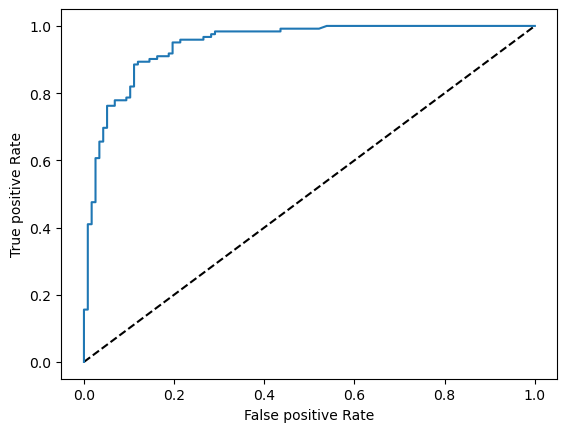

Auc Score: 
 0.8738965952080705


In [100]:
y_pred_probability=Final_Tuned_model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_probability)
roc_auc=auc(fpr,tpr)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='(area=%0.2f)'%roc_auc)
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.show()
auc_score=roc_auc_score(y_test,Final_Tuned_model.predict(x_test))
print('Auc Score:','\n',auc_score)

# saving the model

In [101]:
import joblib
joblib.dump(Final_Tuned_model,"Loan_Application_status.pkl")

['Loan_Application_status.pkl']

# Reload the saved model

In [102]:
# lets load the saved model and get the prediction
model=joblib.load('Loan_Application_status.pkl')

# predictions
prediction=model.predict(x_test)
prediction

array([1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 1.

# checking how the model is behaving

In [103]:
concl=pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted_Loan_status","Original_Loan_status"])
concl

,0,1,2,3,4,5,6,7,8,9,...,229,230,231,232,233,234,235,236,237,238
Predicted_Loan_status,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
Original_Loan_status,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
